In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

In [2]:
######## For animation purpose....

from IPython import display 
from IPython.display import HTML
import matplotlib.animation as animation

In [9]:
plt.style.use("seaborn-white")

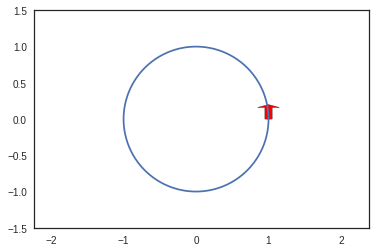

In [10]:
fps = 60
theta = np.arange(0, 2*np.pi, 0.01)
x = np.cos(theta)
y = np.sin(theta)

fig, ax = plt.subplots()
plt.axis("equal")
plt.ylim([-1.5,1.5])
frames = len(theta)
ax.plot(x,y)
#scat = plt.scatter(x[0],y[0])
patch = patches.Arrow(x[0], y[0], 0.0, 0.2,width = 0.5,facecolor='red', edgecolor="black")
ax.add_patch(patch)
def animate_func(i):
    if i % (frames//100) == 0:
        print( '.', end ='' )
    global patch
    
    ax.patches.remove(patch)
    
    vx = 0.2*np.sin(16*np.pi* i /(len(theta)))
    vy = 0.2*np.cos(16*np.pi* i /(len(theta)))
    
    if (1.0*np.pi) < theta[i] and (2.0*np.pi) > theta[i]:
        patch = patches.Arrow(x[i], y[i], vx, vy,
                              width = 0.5,facecolor='red', 
                              edgecolor="black")
    else:
        patch = patches.Arrow(x[i], y[i], vx, vy 
                              ,width = 0.5,facecolor='red', 
                              edgecolor="black")        
    
    ax.add_patch(patch)

    #scat.set_offsets([x[i], y[i]])
    return ax,

anim = animation.FuncAnimation(
                               fig, 
                               animate_func, 
                               frames = len(theta),
                               interval = 1000 / fps, # in ms
                               )

#anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])

#print('Done!')

In [11]:
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

..........................................................................................................

In [19]:
pwd

'/home/dibya/Dibyendu/Project_Heparin/CS12/NoteBooks'

In [18]:
# Example animations using matplotlib's FuncAnimation
# Ken Hughes. 18 June 2016.

# For more detail, see
# https://brushingupscience.wordpress.com/2016/06/21/matplotlib-animations-the-easy-way/

# Examples include
#    - line plot
#    - pcolor plot
#    - scatter plot
#    - contour plot
#    - quiver plot
#    - plot with changing labels

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Use matplotlib ggplot stylesheet if available
try:
    plt.style.use('ggplot')
except:
    pass

# Set which type of animation will be plotted. One of:
# line, pcolor, scatter, contour, quiver, labels
animation_type = 'contour'

# ----------------------------------------------------------------------------
# Create data to plot. F is 2D array. G is 3D array

# Create a two-dimensional array of data: F(x, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
X2, T2 = np.meshgrid(x, t)
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))

# Create three-dimensional array of data G(x, z, t)
x = np.linspace(-3, 3, 91)
t = np.linspace(0, 25, 30)
y = np.linspace(-3, 3, 91)
X3, Y3, T3 = np.meshgrid(x, y, t)
sinT3 = np.sin(2*np.pi*T3 /
               T3.max(axis=2)[..., np.newaxis])
G = (X3**2 + Y3**2)*sinT3

# ----------------------------------------------------------------------------
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(4, 3))

if animation_type not in ['line', 'scatter']:
    ax.set_aspect('equal')


# ----------------------------------------------------------------------------
if animation_type == 'line':
    ax.set(xlim=(-3, 3), ylim=(-1, 1))

    line = ax.plot(x, F[0, :], color='k', lw=2)[0]

    def animate(i):
        line.set_ydata(F[i, :])

# ----------------------------------------------------------------------------
if animation_type == 'pcolor':
    cax = ax.pcolormesh(x, y, G[:-1, :-1, 0], vmin=-1, vmax=1, cmap='Blues')
    fig.colorbar(cax)

    def animate(i):
        cax.set_array(G[:-1, :-1, i].flatten())

# ----------------------------------------------------------------------------
if animation_type == 'scatter':
    ax.set(xlim=(-3, 3), ylim=(-1, 1))
    scat = ax.scatter(x[::3], F[0, ::3])

    def animate(i):
        # Must pass scat.set_offsets an N x 2 array
        y_i = F[i, ::3]
        scat.set_offsets(np.c_[x[::3], y_i])

# ----------------------------------------------------------------------------
if animation_type == 'contour':
    # Keyword options used in every call to contour
    contour_opts = {'levels': np.linspace(-9, 9, 10), 'cmap':'RdBu'}
    cax = ax.contour(x, y, G[..., 0], **contour_opts)

    def animate(i):
        cax.collections = []
        ax.contour(x, y, G[..., i], **contour_opts)

# ----------------------------------------------------------------------------
if animation_type == 'quiver':
    ax.set(xlim=(-4, 4), ylim=(-4, 4))

    # Plot every 20th arrow
    step = 15
    x_q, y_q = x[::step], y[::step]

    # Create U and V vectors to plot
    U = G[::step, ::step, :-1].copy()
    V = np.roll(U, shift=4, axis=2)

    qax = ax.quiver(x_q, y_q, U[..., 0], V[..., 0], scale=100)

    def animate(i):
        qax.set_UVC(U[..., i], V[..., i])

# ----------------------------------------------------------------------------
if animation_type == 'labels':
    ax.set(xlim=(-1, 1), ylim=(-1, 1))
    string_to_type = 'abcdefghijklmnopqrstuvwxyz0123'
    label = ax.text(0, 0, string_to_type[0],
                    ha='center', va='center',
                    fontsize=12)

    def animate(i):
        label.set_text(string_to_type[:i+1])
        ax.set_ylabel('Time (s): ' + str(i/10))
        ax.set_title('Frame ' + str(i))

# ----------------------------------------------------------------------------
# Save the animation
anim = FuncAnimation(fig, animate, interval=100, frames=len(t)-1, repeat=True)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()
# anim.save(animation_type + '.gif', writer='imagemagick')

/tmp/ipykernel_2787711/2405888976.py:87: UserWarning: No contour levels were found within the data range.
  cax = ax.contour(x, y, G[..., 0], **contour_opts)
/tmp/ipykernel_2787711/2405888976.py:91: UserWarning: No contour levels were found within the data range.
  ax.contour(x, y, G[..., i], **contour_opts)
